## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Taking a quick look at the above, I think that it would be interesting to look at the Race/Ethnicity : Lunch relationship, as the head shows that the only person from Group A is the only person with their lunch paid for.**

**I would also be interested to see how students parents education levels matched up with their test scores.**

In [9]:
df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [10]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
df['lunch_y/n'] = df['lunch'].map(lambda x: 0 if x == 'standard' else 1)
df['lunch_y/n']

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    0
999    1
Name: lunch_y/n, Length: 1000, dtype: int64

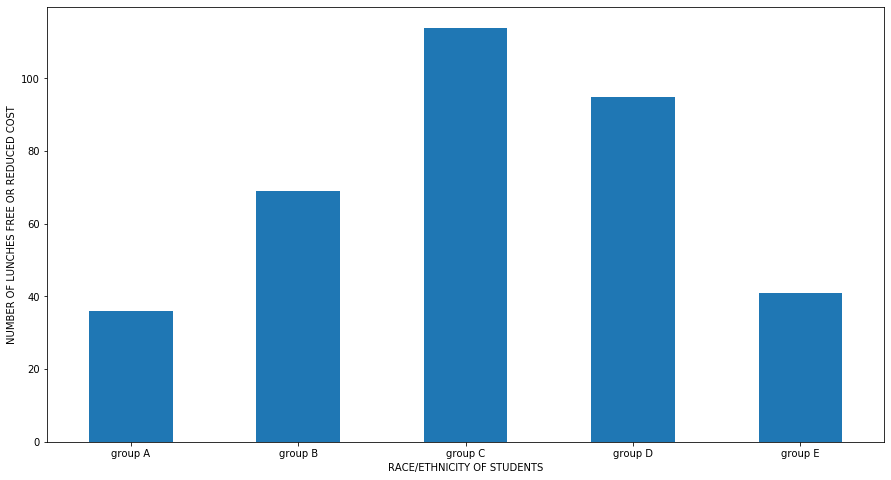

In [27]:
race_lunch= df.groupby('race/ethnicity')['lunch_y/n'].sum()
race_lunch.plot.bar(x='lunch_y/n', rot=0, figsize=(15,8));
plt.xlabel('Race/Ethnicity of Students'.upper());
plt.ylabel('Number of lunches free or reduced cost'.upper());

In [67]:
df['Overall Score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
overall_score = df['Overall Score']
df['Overall Score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: Overall Score, dtype: float64

In [66]:
parents_ed = df['parental level of education']

df.groupby(parents_ed)['Overall Score'].mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: Overall Score, dtype: float64

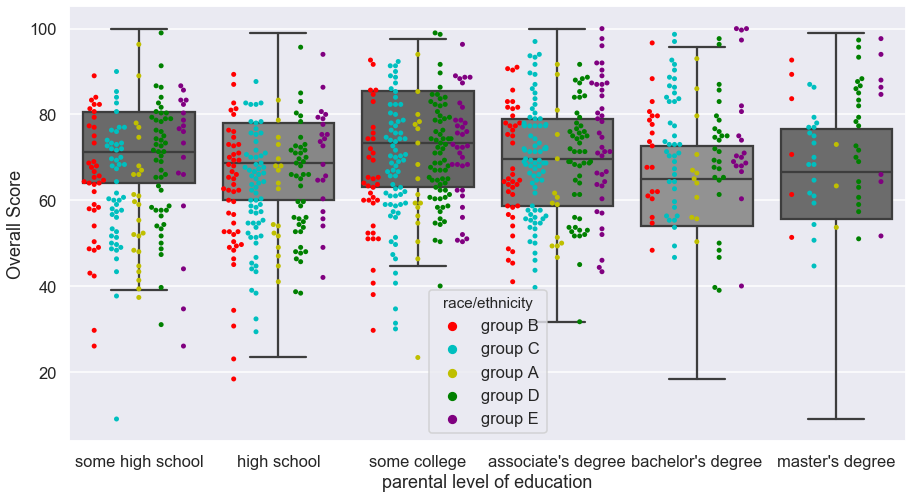

In [105]:
plt.figure(figsize=(15,8))
order1 = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'] 
palette1 = ['r', 'c', 'y', 'g', 'purple', 'orange']
sns.set_context('talk')
sns.set_style('darkgrid')

ax = sns.boxplot(x = parents_ed,
                 y = overall_score,
                 data = df,
                 saturation=0,
                 whis=np.inf)

sns.swarmplot(x = parents_ed,
              y = overall_score,
              palette = palette1,
              data = df,
              size = 5,
              hue = 'race/ethnicity',
              order = order1, 
              dodge=True,
              ax=ax);

**I like the way that this plot represents what I was trying to look for: a relationship between the students overall outcome of the tests with their parents level of education**

**Bonus!! I adjusted the hue to further detail the performance by race/ethnicity group :)**